In [2]:
import pandas as pd
import datetime
import numpy as np
import warnings

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']  # 画图显示中文
path = "D:/program/program1/User_portrait/"

In [3]:
data_company = pd.read_csv(path + "20190301.csv", names = ['order_date', 'company', 'total_freight'])

## RFM模型

In [4]:
data_company['order_date'] = pd.to_datetime(data_company['order_date'], format = '%Y-%m-%d')

In [5]:
data_company['data_diff'] = pd.to_datetime('today') - data_company['order_date']

In [6]:
data_company['data_diff'] = data_company['data_diff'].dt.days

In [7]:
R_data = data_company.groupby(by = 'company')['data_diff'].agg({'recency' : np.min})

In [8]:
F_data = data_company.groupby(by = 'company')['order_date'].agg({'frequency':np.size})

In [9]:
M_data = data_company.groupby(by = 'company')['total_freight'].agg({'monetary':np.sum})

In [10]:
rfm_data = pd.concat([R_data, F_data, M_data], axis = 1)

In [11]:
rfm_data.head()

,recency,frequency,monetary
company,,,
01个人刘健,65,2,669.00
3M苏州,82,8,4452.50
66号定制家居,43,6,12928.60
Dotwil点为商城,34,4,635.79
IT中心测试,42,3,217.00


In [12]:
# rfm_data['recency_label'] = 0
# rfm_data['frequency_label'] = 0
# rfm_data['monetary_label'] = 0
# rfm_data.loc[rfm_data['recency'] < rfm_data['recency'].mean(), ['recency_label']] = 1
# rfm_data.loc[rfm_data['frequency'] > rfm_data['frequency'].mean(), ['frequency_label']] = 1
# rfm_data.loc[rfm_data['monetary'] > rfm_data['monetary'].mean(), ['monetary_label']] = 1

In [13]:
# rfm_data['rfm'] = rfm_data['recency_label'].map(str) + rfm_data['frequency_label'].map(str) + rfm_data['monetary_label'].map(str)

In [14]:
# rfm_data['recency'].mean(), rfm_data['frequency'].mean(), rfm_data['monetary'].mean()

In [15]:
# rfm_data.head()

111:重要价值客户, 101:重要发展客户, 011:重要保持客户，001:重要挽留客户, 110:一般价值客户,100:一般发展客户, 010:一般保持客户,000：一般挽留客户

In [16]:
# rfm_data['rfm'].value_counts()

In [17]:
def create_label(data, n, mark):
    bins = data.quantile(q = np.linspace(0,1,n), interpolation = 'nearest')
    bins[0] = 0
    if mark == 1:
        labels = [5, 4, 3, 2, 1]
    elif mark == 2:
        labels = [1, 2, 3, 4, 5]
    else:
        labels = [1, 2, 3, 4, 5, 6, 7, 8]
    label = pd.cut(data, bins = bins, labels = labels)
    return label

In [18]:
R_label = create_label(rfm_data['recency'], 6, 1)
F_label = create_label(rfm_data['frequency'], 6, 2)
M_label = create_label(rfm_data['monetary'], 6, 2)

In [19]:
rfm_data['R_label'] = R_label
rfm_data['F_label'] = F_label
rfm_data['M_label'] = M_label

In [20]:
rfm_data.dropna(axis = 0, inplace = True)

In [21]:
rfm_data['rfm'] = 100 * rfm_data['R_label'].astype(int) + 10 * rfm_data['F_label'].astype(int) + 1 * rfm_data['M_label'].astype(int)

In [22]:
rfm_data['level'] = create_label(rfm_data['rfm'], 9, 3)

In [43]:
rfm_data.head()

,recency,frequency,monetary,R_label,F_label,M_label,rfm,level
company,,,,,,,,
01个人刘健,65,2,669.00,3,2,2,322,4
3M苏州,82,8,4452.50,2,4,4,244,3
66号定制家居,43,6,12928.60,4,4,5,445,6
Dotwil点为商城,34,4,635.79,5,3,2,532,7
IT中心测试,42,3,217.00,4,3,1,431,6


Text(0.5,0,'Z Label')

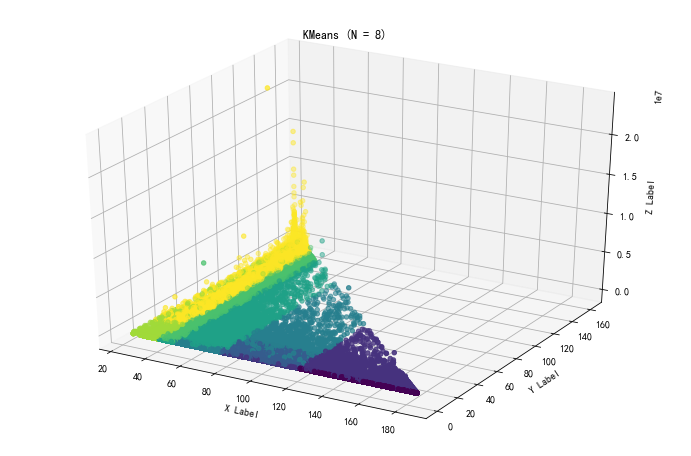

In [42]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
 
# fig = plt.figure(figsize = (12,8))
# ax = fig.add_subplot(111, projection='3d')
 
# ax.scatter(rfm_data['recency'], rfm_data['frequency'], rfm_data['monetary'], c=rfm_data['level'])
# plt.title("KMeans (N = 8)")
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

In [28]:
rfm_data['recency_label'] = 0
rfm_data['frequency_label'] = 0
rfm_data['monetary_label'] = 0
rfm_data.loc[rfm_data['R_label'].astype(int) > rfm_data['R_label'].astype(int).mean(), ['recency_label']] = 1
rfm_data.loc[rfm_data['F_label'].astype(int) > rfm_data['F_label'].astype(int).mean(), ['frequency_label']] = 1
rfm_data.loc[rfm_data['M_label'].astype(int) > rfm_data['M_label'].astype(int).mean(), ['monetary_label']] = 1

In [29]:
rfm_data['rfm'] = rfm_data['recency_label'].map(str) + rfm_data['frequency_label'].map(str) + rfm_data['monetary_label'].map(str)

In [30]:
rfm_data['recency'].mean(), rfm_data['frequency'].mean(), rfm_data['monetary'].mean()

(76.39822700110925, 16.5259553798261, 16638.86216570667)

111:重要价值客户, 101:重要发展客户, 011:重要保持客户，001:重要挽留客户, 110:一般价值客户,100:一般发展客户, 010:一般保持客户,000：一般挽留客户

In [33]:
rfm_data['rfm'].value_counts()

111    70560
000    64461
011    40090
001    18420
100    10550
010     9725
101     5076
110     4694
Name: rfm, dtype: int64

In [31]:
rfm_data.head()

,recency,frequency,monetary,R_label,F_label,M_label,rfm,level,recency_label,frequency_label,monetary_label
company,,,,,,,,,,,
01个人刘健,64,2,669.00,3,2,2,000,4,0,0,0
3M苏州,81,8,4452.50,2,4,4,011,3,0,1,1
66号定制家居,42,6,12928.60,4,4,5,111,6,1,1,1
Dotwil点为商城,33,4,635.79,5,3,2,110,7,1,1,0
IT中心测试,41,3,217.00,4,3,1,110,6,1,1,0


In [25]:
len(rfm_data)

223576

In [19]:
rfm_c1 = list(rfm_data['level'].value_counts().sort_index()) # 统计每个类别个数
rfm_c2 = list(rfm_data['level'].value_counts().sort_index()/len(rfm_data)*100)
rfm_c3 = list(map(lambda x: str(round(x, 2)) + '%', rfm_c2))
# 每个类别金额占比
rfm_sum = rfm_data['monetary'].groupby(rfm_data['level']).sum()
rfm_percent = rfm_sum/rfm_data['monetary'].sum() * 100
rfm_c4 = rfm_percent.map(lambda x : str(round(x, 2)) + "%")

rfm_c = pd.DataFrame({'level': range(1, len(rfm_c1)+1), '数量': rfm_c1, '客户类型占比': rfm_c3, '运费占比' : rfm_c4})
rfm_c

,level,数量,客户类型占比,运费占比
level,,,,
1,1,28009,12.53%,0.36%
2,2,32617,14.59%,1.33%
3,3,25716,11.5%,1.27%
4,4,28707,12.84%,2.03%
5,5,25517,11.41%,4.18%
6,6,31580,14.12%,9.81%
7,7,26281,11.75%,3.26%
8,8,25149,11.25%,77.78%


## RFM + KMeans

In [44]:
c_data = rfm_data[['recency', 'frequency', 'monetary']]

In [45]:
c_data.head()

,recency,frequency,monetary
company,,,
01个人刘健,65,2,669.00
3M苏州,82,8,4452.50
66号定制家居,43,6,12928.60
Dotwil点为商城,34,4,635.79
IT中心测试,42,3,217.00


In [50]:
# scaler = MinMaxScaler()
# min_max = scaler.fit_transform(c_data)
# pd.DataFrame(min_max).head()

In [51]:
min_max = c_data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
min_max.head()

,recency,frequency,monetary
company,,,
01个人刘健,0.25000,0.00625,0.000028
3M苏州,0.35625,0.04375,0.000190
66号定制家居,0.11250,0.03125,0.000551
Dotwil点为商城,0.05625,0.01875,0.000027
IT中心测试,0.10625,0.01250,0.000009


In [52]:
min_max.columns = ['SR', 'SF', 'SM']

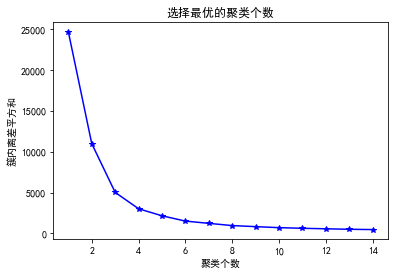

In [84]:
K = range(1,15)
GSSE = []
for k in K:
    SSE = []
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(min_max)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
#     for label in set(labels):
#         SSE.append(np.sum(np.sum((min_max[['SR', 'SF','SM']].loc[labels == label,] - centers[label, :]) ** 2)))
    SSE.append(kmeans.inertia_)
    GSSE.append(np.sum(SSE))

# kmeans.inertia_ : 计算点到簇中心的距离

# 绘制K的个数与GSSE的关系
plt.plot(K, GSSE, 'b*-')
plt.xlabel('聚类个数')
plt.ylabel('簇内离差平方和')
plt.title('选择最优的聚类个数')
plt.show()

In [54]:
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=21)
kmeans.fit(min_max)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=21, tol=0.0001, verbose=0)

In [61]:
c_data['cluster'] = kmeans.labels_ + 1

In [62]:
c_data.head()

,recency,frequency,monetary,cluster
company,,,,
01个人刘健,64,2,669.00,1
3M苏州,81,8,4452.50,1
66号定制家居,42,6,12928.60,4
Dotwil点为商城,33,4,635.79,4
IT中心测试,41,3,217.00,4


In [63]:
rfm_data.head()

,recency,frequency,monetary,R_label,F_label,M_label,rfm,level
company,,,,,,,,
01个人刘健,64,2,669.00,3,2,2,322,4
3M苏州,81,8,4452.50,2,4,4,244,3
66号定制家居,42,6,12928.60,4,4,5,445,6
Dotwil点为商城,33,4,635.79,5,3,2,532,7
IT中心测试,41,3,217.00,4,3,1,431,6


In [71]:
rfm_data['cluster']=c_data["cluster"]
rfm_data['cluster'] = rfm_data['cluster']
# 计算每个类别的数据量
kmeans_c1 = list(c_data["cluster"].value_counts().sort_index())

# 计算每个类别所占的百分比
kmeans_c2 = list(c_data["cluster"].value_counts().sort_index() / len(c_data) * 100)
kmeans_c3 = (list(map(lambda x: str(round(x, 2)) + "%", kmeans_c2)))

# 每个类别金额占比
kmeans_sum = c_data['monetary'].groupby(c_data['cluster']).sum()
kmeans_percent = kmeans_sum/c_data['monetary'].sum() * 100
kmeans_c4 = kmeans_percent.map(lambda x : str(round(x, 2)) + "%")

kmeans_c = pd.DataFrame({"cluster": range(1, len(kmeans_c1) + 1), "数量": kmeans_c1, "客户类型占比": kmeans_c3, "运费" : kmeans_sum, "运费占比" : kmeans_c4})
kmeans_c

,cluster,数量,客户类型占比,运费,运费占比
cluster,,,,,
1,1,38548,17.24%,8.810952e+07,2.37%
2,2,12009,5.37%,7.092311e+08,19.07%
3,3,22854,10.22%,3.435797e+07,0.92%
4,4,68075,30.45%,2.418425e+08,6.5%
5,5,21355,9.55%,2.403483e+07,0.65%
6,6,29725,13.3%,5.971063e+07,1.61%
7,7,21752,9.73%,4.659052e+08,12.52%
8,8,9258,4.14%,2.096859e+09,56.37%


In [83]:
rfm_data[rfm_data['cluster'] == 8].head(10)

,recency,frequency,monetary,R_label,F_label,M_label,rfm,level,cluster
company,,,,,,,,,
Syneventive,30,123,287274.30,5,5,5,555,8,8
三河飞嘉,38,106,96496.10,5,5,5,555,8,8
上海LEE(嘉定),24,155,265746.50,5,5,5,555,8,8
上海USZ,33,115,212415.36,5,5,5,555,8,8
上海一胜百,31,138,114733.60,5,5,5,555,8,8
上海七浦路服装,31,104,159076.05,5,5,5,555,8,8
上海万卡,34,117,104024.60,5,5,5,555,8,8
上海万洋,36,114,45618.20,5,5,5,555,8,8
上海三枪,33,116,614952.02,5,5,5,555,8,8
